# **Install and import required python libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the Dataset**

In [3]:
# Load the Mushroom dataset
file_path = r'C:\Users\user\Desktop\Github\MuhammadAdnan-FYP\agaricus-lepiota.data'

# **Import the Dataset**

In [4]:
# Define column names from Dataset Description
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
           'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
           'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color',
           'ring-number', 'ring-type', 'spore-print-color',
           'population', 'habitat']

In [5]:
# Read the Data into a Dataframe
df = pd.read_csv(file_path, header=None, names=columns)

# **Display basic info**

In [6]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
df.shape

(8124, 23)

# **Missing Values in the Dataset**

In [8]:
df.isin(['?']).sum()

class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# **Fill Missing Values**

In [10]:
# Replace '?' with NaN and show nulls
df.replace('?', np.nan, inplace=True)
print("\nMissing values after replacement:\n", df.isnull().sum())


Missing values after replacement:
 class                          0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [11]:
# Fill missing values using mode
df = df.apply(lambda col: col.fillna(col.mode()[0]) if col.isnull().any() else col)

# **Label Encoding**

In [12]:
# Encode categorical features using label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# **EDA**

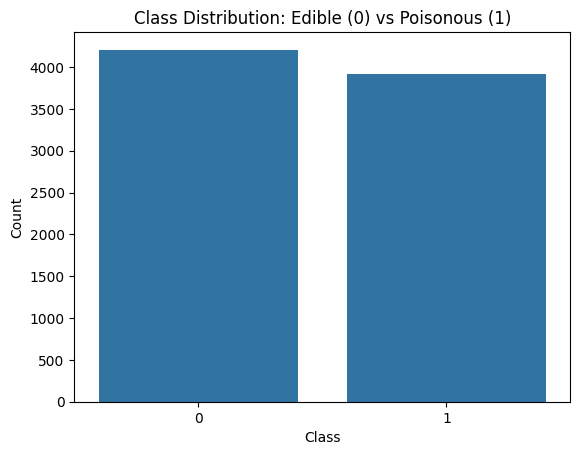

In [13]:
# Class distribution
sns.countplot(x='class', data=df)
plt.title('Class Distribution: Edible (0) vs Poisonous (1)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [14]:
# Count how many are edible (0) and how many are poisonous (1)
counts = df['class'].value_counts()

# Display the results
print("Class Distribution:")
print(f"Edible (0): {counts[0]}")
print(f"Poisonous (1): {counts[1]}")

Class Distribution:
Edible (0): 4208
Poisonous (1): 3916


# **HeatMap Correlation**

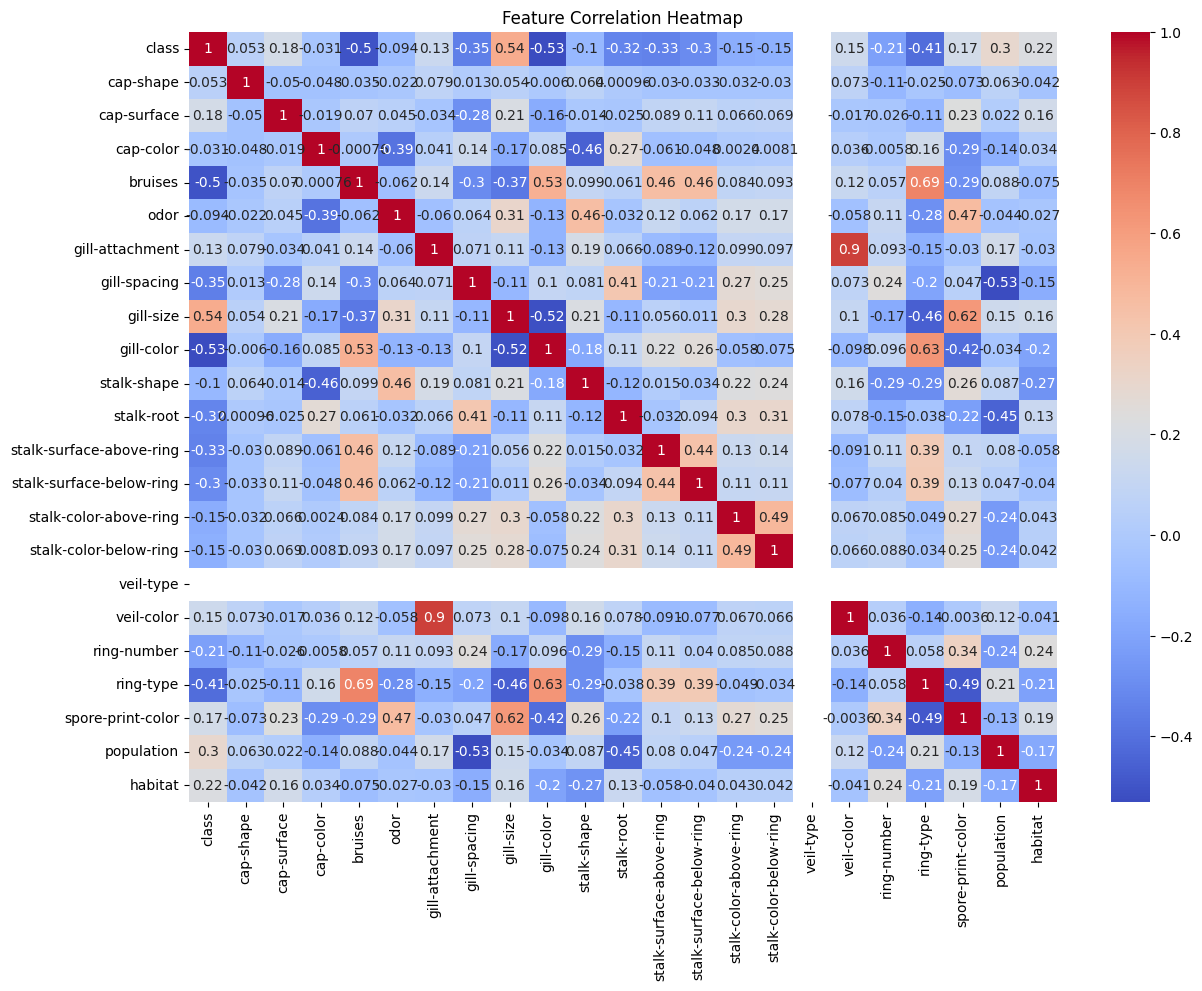

In [15]:
# Heatmap of feature correlations
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# **Pair Plot**

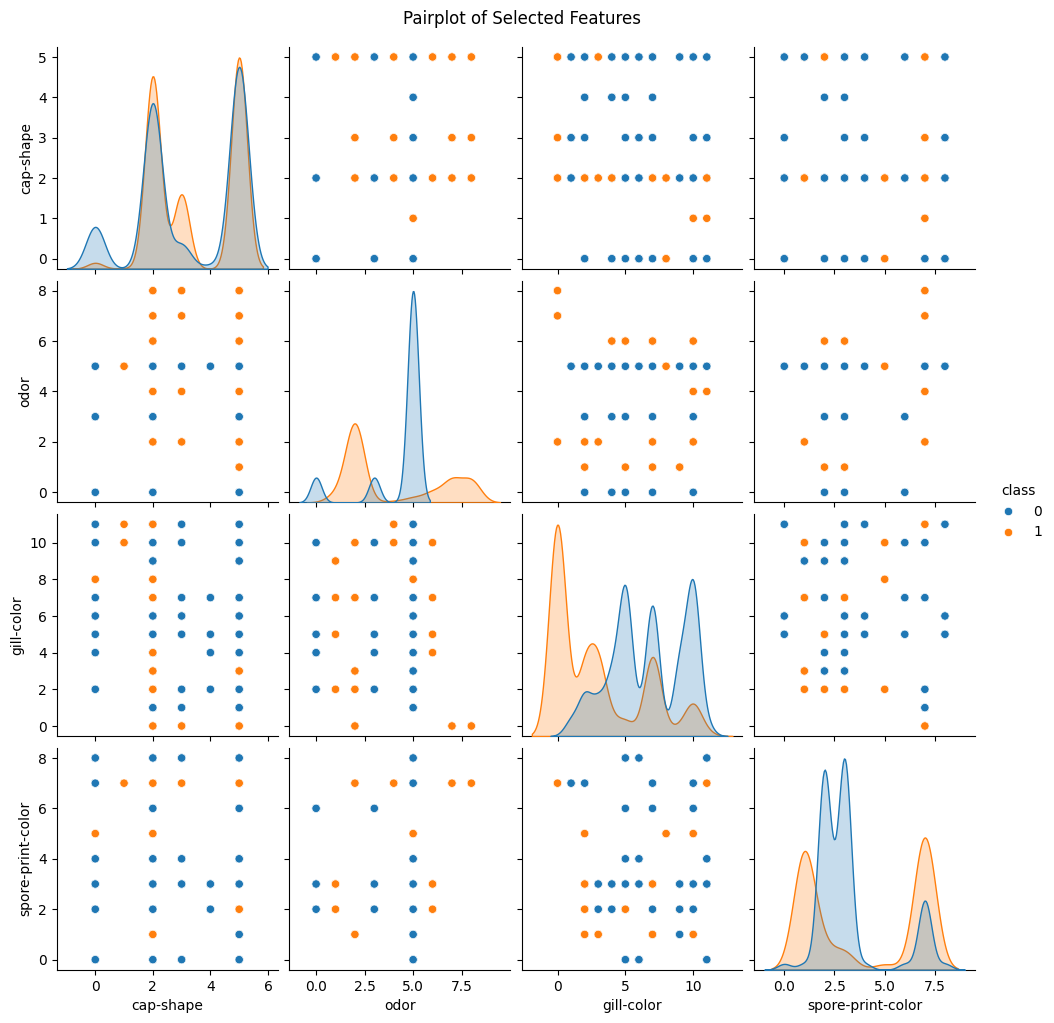

In [16]:
# Pairplot of few selected features
selected_cols = ['class', 'cap-shape', 'odor', 'gill-color', 'spore-print-color']
sns.pairplot(df[selected_cols], hue='class')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# **Model Development**

In [20]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# **Train Test Split**

In [42]:
# Prepare feature and target
X = df.drop('class', axis=1)
Y = df['class']

# Train test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# **Initialize Models**

In [43]:
# initializing models xgboost, svm, naive bayes
models = {
    'XGBoost': XGBClassifier(eval_metric='logloss'),
    'SVM': SVC(kernel='rbf', probability=True),
    'Naive Bayes': GaussianNB()
}

# **Define Evaluation Matrics**

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, cohen_kappa_score, matthews_corrcoef, brier_score_loss,
    balanced_accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay,
    roc_curve
)

def evaluate_all_metrics(name, model, X_train, X_test, Y_train, Y_test):
    # Train the model
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)

    # Probabilities or decision function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        y_score = None

    # Metrics
    acc = accuracy_score(Y_test, y_pred)
    kappa = cohen_kappa_score(Y_test, y_pred)
    mcc = matthews_corrcoef(Y_test, y_pred)
    balanced_acc = balanced_accuracy_score(Y_test, y_pred)
    brier_score = brier_score_loss(Y_test, y_score) if y_score is not None else None
    roc_score = roc_auc_score(Y_test, y_score) if y_score is not None else None

    # Print summary
    print(f"\n===== {name} =====")
    print(f"Accuracy           : {acc:.4f}")
    print(f"Cohen's Kappa      : {kappa:.4f}")
    print(f"MCC                : {mcc:.4f}")
    print(f"Balanced Accuracy  : {balanced_acc:.4f}")
    print(f"Brier Score        : {brier_score:.4f}" if brier_score is not None else "Brier Score        : Not computed (no probability output)")
    print(f"ROC AUC Score      : {roc_score:.4f}" if roc_score is not None else "ROC AUC Score      : Not computed (no probability output)")

    # Confusion Matrix
    cm = confusion_matrix(Y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible", "Poisonous"])
    disp.plot(cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.grid(False)
    plt.show()

    # ROC Curve
    if y_score is not None:
        fpr, tpr, _ = roc_curve(Y_test, y_score)
        plt.figure(figsize=(6, 5))
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_score:.2f})', color='darkorange')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.title(f'ROC Curve - {name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.grid(True)
        plt.show()


# **Evaluate and Display Metrics**


===== XGBoost =====
Accuracy           : 1.0000
Cohen's Kappa      : 1.0000
MCC                : 1.0000
Balanced Accuracy  : 1.0000
Brier Score        : 0.0000
ROC AUC Score      : 1.0000


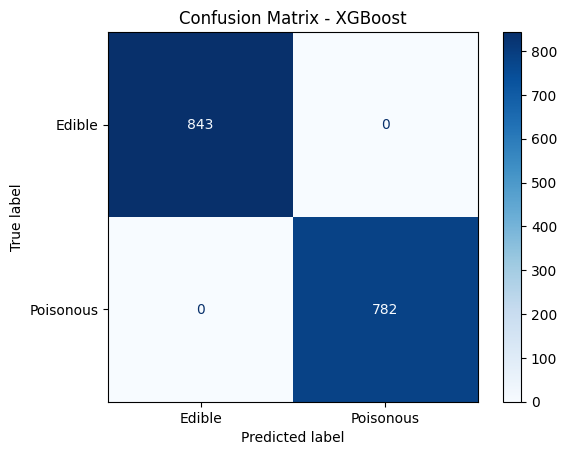

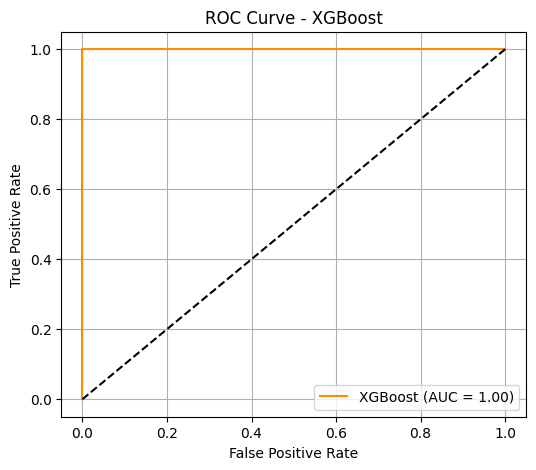


===== SVM =====
Accuracy           : 0.9914
Cohen's Kappa      : 0.9827
MCC                : 0.9828
Balanced Accuracy  : 0.9912
Brier Score        : 0.0060
ROC AUC Score      : 0.9999


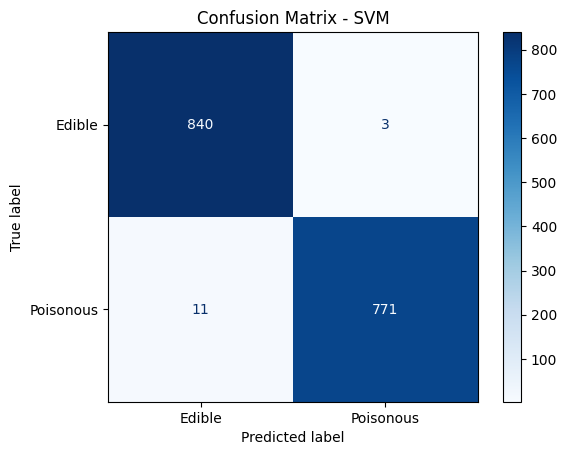

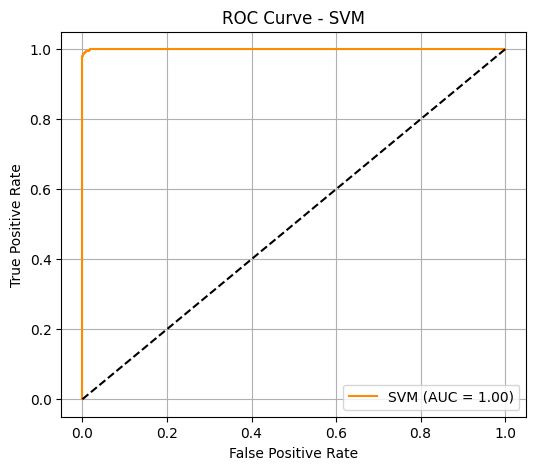


===== Naive Bayes =====
Accuracy           : 0.9028
Cohen's Kappa      : 0.8053
MCC                : 0.8053
Balanced Accuracy  : 0.9028
Brier Score        : 0.0791
ROC AUC Score      : 0.9537


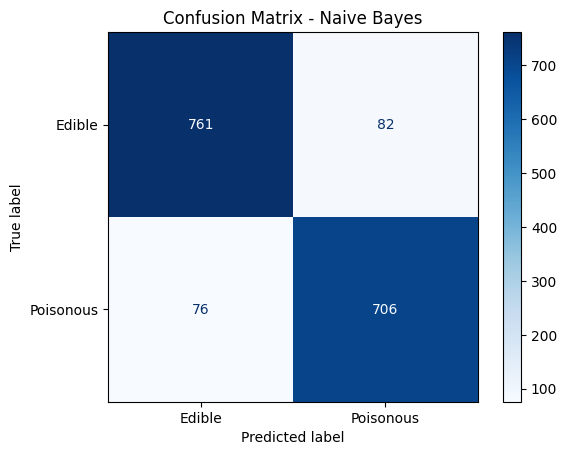

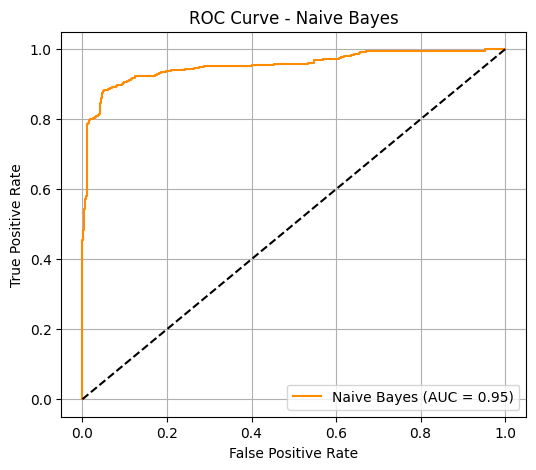

In [45]:
# evaluate and display metrics for all models in one cell
for name, model in models.items():
    evaluate_all_metrics(name, model, X_train, X_test, Y_train, Y_test)

# **10 Fold Cross Validation**

In [48]:
from sklearn.model_selection import cross_val_score

# Apply cross-validation to each model and compare accuracy and std
for name, model in models.items():
    scores = cross_val_score(model, X, Y, cv=10, scoring='balanced_accuracy')
    print(f"{name} Balanced Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")

XGBoost Balanced Accuracy: 0.9645 (+/- 0.0974)
SVM Balanced Accuracy: 0.9173 (+/- 0.1288)
Naive Bayes Balanced Accuracy: 0.8390 (+/- 0.1065)
